## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
MOMENTUM = [0.25, 0.60, 0.95]
NESTEROV = [True, False]
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = 1e-4

In [7]:
results = {}
"""Code Here
請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    for ne in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f, NESTEROV = %s" % (mo, ne))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=ne, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mo-%s-ne-%s" % (str(mo), str(ne))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.250000, NESTEROV = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.3425 - acc: 0.1071 - val_loss: 2.3220 - val_acc: 0.1107
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.3075 - acc: 0.1202 - val_loss: 2.2970 - val_acc: 0.1242
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2870 - acc: 0.1347 - val_loss: 2.2801 - val_acc: 0.1436
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2720 - acc: 0.1612 - val_loss: 2.2669 - val_acc: 0.1764
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2599 - acc: 0.1912 - val_loss: 2.2558 - val_acc: 0.1931
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2495 - acc: 0.2035 - val_loss: 2.2461 - val_acc: 0.2008
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2400 - acc: 0.2111 - val_loss: 2.2372 - val_acc

50000/50000 [==============================] - 4s 80us/step - loss: 2.2739 - acc: 0.1418 - val_loss: 2.2600 - val_acc: 0.1615
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2490 - acc: 0.1752 - val_loss: 2.2385 - val_acc: 0.1866
Epoch 4/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.2288 - acc: 0.1982 - val_loss: 2.2196 - val_acc: 0.2068
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2103 - acc: 0.2137 - val_loss: 2.2018 - val_acc: 0.2217
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1928 - acc: 0.2269 - val_loss: 2.1851 - val_acc: 0.2331
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1765 - acc: 0.2370 - val_loss: 2.1695 - val_acc: 0.2455
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1614 - acc: 0.2458 - val_loss: 2.1549 - val_acc: 0.2513
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 74us/step - loss: 2.2261 - acc: 0.1822 - val_loss: 2.2160 - val_acc: 0.1923
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2066 - acc: 0.1992 - val_loss: 2.1981 - val_acc: 0.2072
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.1897 - acc: 0.2118 - val_loss: 2.1821 - val_acc: 0.2163
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.1743 - acc: 0.2214 - val_loss: 2.1672 - val_acc: 0.2246
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.1598 - acc: 0.2296 - val_loss: 2.1533 - val_acc: 0.2330
Epoch 8/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.1463 - acc: 0.2366 - val_loss: 2.1402 - val_acc: 0.2382
Epoch 9/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.1336 - acc: 0.2425 - val_loss: 2.1279 - val_acc: 0.2473
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 80us/step - loss: 2.0129 - acc: 0.2974 - val_loss: 1.9907 - val_acc: 0.3082
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9710 - acc: 0.3095 - val_loss: 1.9539 - val_acc: 0.3198
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9372 - acc: 0.3234 - val_loss: 1.9242 - val_acc: 0.3257
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9103 - acc: 0.3302 - val_loss: 1.8992 - val_acc: 0.3349
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8875 - acc: 0.3390 - val_loss: 1.8795 - val_acc: 0.3440
Epoch 9/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8676 - acc: 0.3458 - val_loss: 1.8599 - val_acc: 0.3479
Epoch 10/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8505 - acc: 0.3507 - val_loss: 1.8449 - val_acc: 0.3535
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 4s 76us/step - loss: 1.9210 - acc: 0.3269 - val_loss: 1.9042 - val_acc: 0.3327
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8927 - acc: 0.3377 - val_loss: 1.8798 - val_acc: 0.3415
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8697 - acc: 0.3438 - val_loss: 1.8597 - val_acc: 0.3511
Epoch 8/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8504 - acc: 0.3514 - val_loss: 1.8408 - val_acc: 0.3597
Epoch 9/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8331 - acc: 0.3573 - val_loss: 1.8237 - val_acc: 0.3626
Epoch 10/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8175 - acc: 0.3632 - val_loss: 1.8096 - val_acc: 0.3710
Epoch 11/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8034 - acc: 0.3699 - val_loss: 1.7964 - val_acc: 0.3723
Epoch 12/50
50000/50000 [=========================

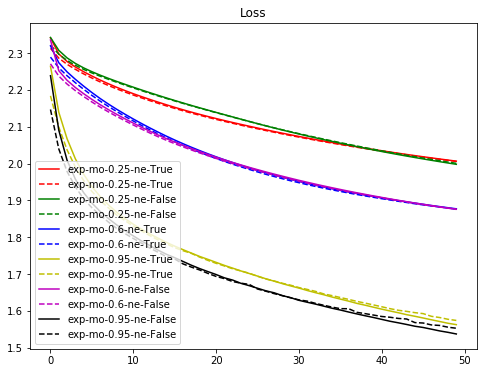

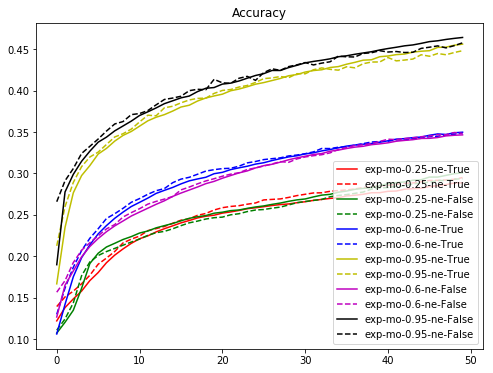

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()